<a href="https://colab.research.google.com/github/neeluvermaiitj/Dependable-AI/blob/main/DAI_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

# Prepare model for classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
# getting tenser flow for the dataset
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

# load train and test dataset
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

#xTrain = xTrain / 255.0
#xTest = xTest / 255.0
xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')
# one hot encode target values
yTrainCat = to_categorical(yTrain, 10)
yTestCat = to_categorical(yTest, 10)


print(xTest.shape)
print(yTest.shape)
print(yTrainCat.shape)
print(yTestCat.shape)

(10000, 32, 32, 3)
(10000, 1)
(50000, 10)
(10000, 10)


In [ ]:
# define cnn model
cifarModel = models.Sequential()
cifarModel.add(Conv2D(input_shape=(32, 32, 3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cifarModel.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
cifarModel.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cifarModel.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(Dropout(0.4))
cifarModel.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cifarModel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cifarModel.add(Dropout(0.4))
cifarModel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cifarModel.add(Dropout(0.4))
cifarModel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cifarModel.add(Dropout(0.4))
cifarModel.add(Flatten())
cifarModel.add(Dense(256, activation='relu'))
cifarModel.add(Dropout(0.4))
cifarModel.add(Dense(100, activation='relu'))
cifarModel.add(Dropout(0.4))
cifarModel.add(Dense(10, activation='softmax'))

cifarModel.summary()

# compile model
opt = SGD(lr=0.001, momentum=0.9)
#cifarModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cifarModel.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = cifarModel.fit(xTrain, yTrainCat, epochs=50, batch_size=32, validation_data=(xTest, yTestCat))

_, testAccuracy = cifarModel.evaluate(xTest, yTestCat, verbose = 2)
print('Test accuracy:', testAccuracy)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        18464     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)       

In [ ]:
_, testAccuracy = model.evaluate(xTest, yTestCat, verbose = 2)
print('Test accuracy:', testAccuracy)

313/313 - 1s - loss: 0.5740 - accuracy: 0.8205
Test accuracy: 0.8205000162124634


[['airplane' '0.8116343490304709']
 ['automobile' '0.8959318826868495']
 ['bird' '0.8187772925764192']
 ['cat' '0.6779170684667309']
 ['deer' '0.7988394584139265']
 ['dog' '0.8105381165919282']
 ['frog' '0.8365472910927456']
 ['horse' '0.8697394789579158']
 ['ship' '0.9384449244060475']
 ['truck' '0.9183884297520661']]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


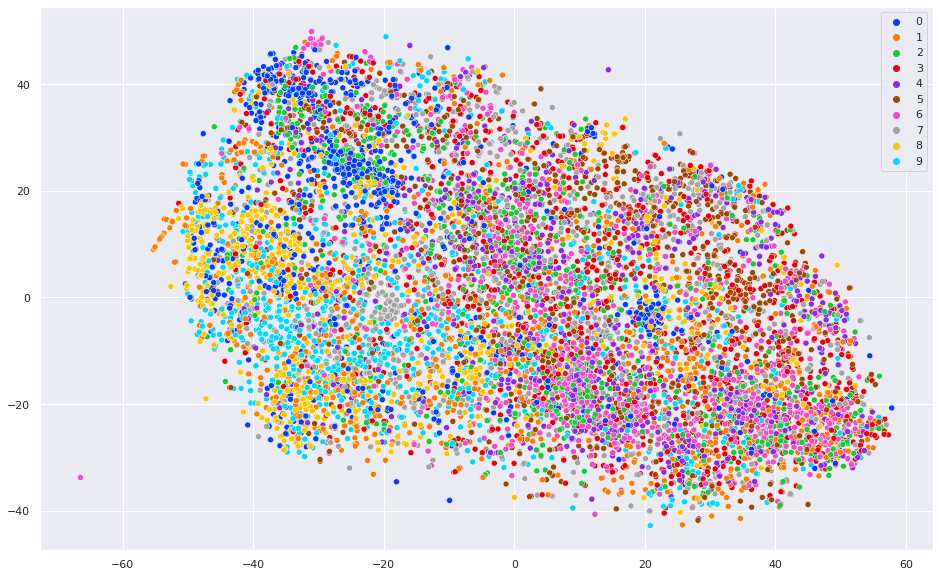

In [ ]:
from sklearn.metrics import confusion_matrix

#classwise accuracy
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predTest = np.argmax(cifarModel.predict(xTest), axis = 1)
confMatrix = confusion_matrix(predTest, yTest)
confMatrix = confMatrix.astype('float') / confMatrix.sum(axis=1)[:, np.newaxis]
print(np.array([[d, c] for d, c in zip(classes, confMatrix.diagonal())]))

#cifarModel.save(F"/content/gdrive/My Drive/dai3Model.h5")

palette = sns.color_palette("bright", 10)
sns.set(rc={'figure.figsize':(16,10)})

#TSNE on test data
xTsne = xTest.reshape((-1, 3072))
tsne = TSNE()
xTsne = tsne.fit_transform(xTsne)
sns.scatterplot(xTsne[:,0], xTsne[:,1], hue = yTest.reshape(yTestCat.shape[0]), legend = 'full', palette = palette)



# GradCAM implementation

In [ ]:
def make_gradcam_heatmap( img_array, model, last_conv_layer_name, classifier_layer_names):
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    with tf.GradientTape() as tape:        
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)        
        preds = classifier_model(last_conv_layer_output)
        preds = preds[0][0]        
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(last_conv_layer_output, axis=-1)

    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap


def display_heatmap(img,heatmap,image_save_name = "test",weight = 0.02):
 
  img = keras.preprocessing.image.img_to_array(img)
  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)
  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")
  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]
  # We create an image with RGB colorized heatmap
  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
  # Superimpose the heatmap on original image
  superimposed_img = jet_heatmap * weight + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
  # Save the superimposed image
  path = F"/content/gdrive/My Drive/DAI-P3/{image_save_name}.jpg" 
  superimposed_img.save(path)
 
  fig = plt.figure(figsize=(10,10))
  plt.matshow(img)
  # Display superimposed heatmap
  plt.matshow(superimposed_img)
  plt.show()


In [ ]:
for layer in cifarModel.layers:
    print(layer.name)
print("<======================>")
for layer in denseModel.layers:
    print(layer.name)

conv2d_11
conv2d_12
conv2d_13
max_pooling2d_5
conv2d_14
conv2d_15
dropout_6
max_pooling2d_6
conv2d_16
conv2d_17
max_pooling2d_7
dropout_7
conv2d_18
conv2d_19
max_pooling2d_8
dropout_8
conv2d_20
conv2d_21
max_pooling2d_9
dropout_9
flatten_1
dense_3
dropout_10
dense_4
dropout_11
dense_5
<======================>
conv2d_11_input
conv2d_11
conv2d_12
conv2d_13
max_pooling2d_5
conv2d_14
conv2d_15
dropout_6
max_pooling2d_6
conv2d_16
conv2d_17
max_pooling2d_7
dropout_7
conv2d_18
conv2d_19
max_pooling2d_8
dropout_8
conv2d_20
conv2d_21
max_pooling2d_9
dropout_9
flatten_1
dense_3
dropout_10
dense_4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor([0 0 0 ... 0 0 0], shape=(10000,), dtype=int64)


<Figure size 720x720 with 0 Axes>

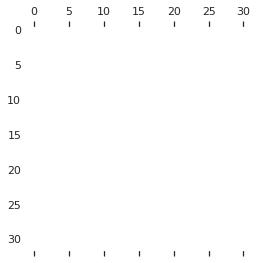

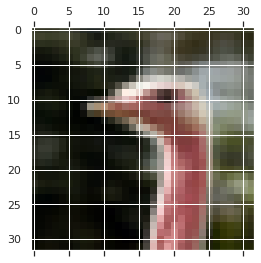

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

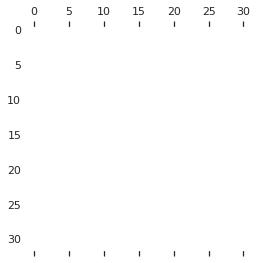

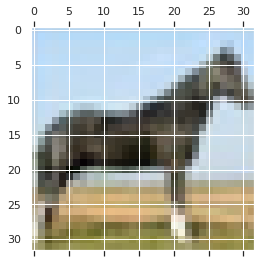

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

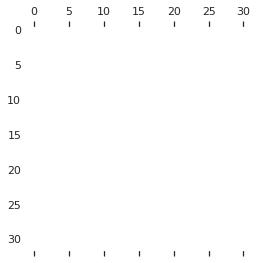

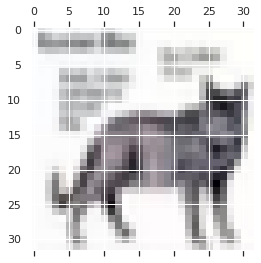

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

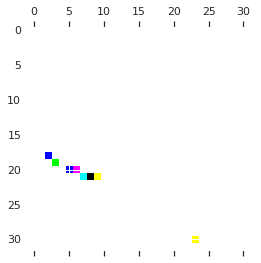

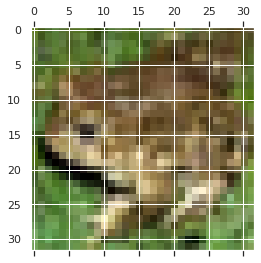

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

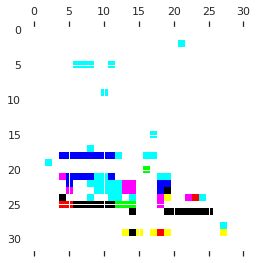

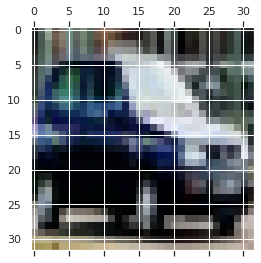

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

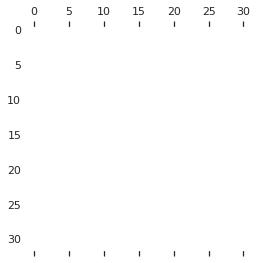

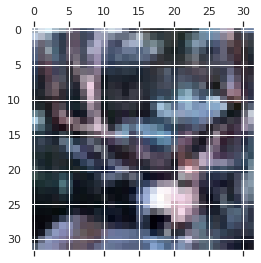

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

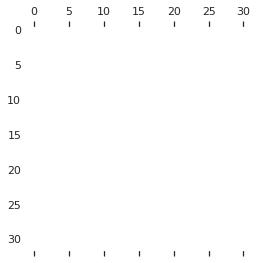

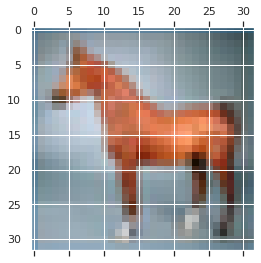

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

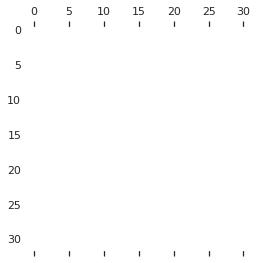

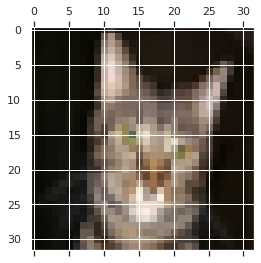

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

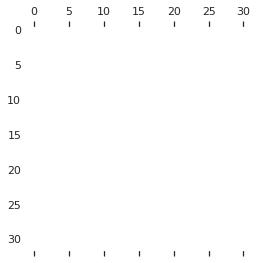

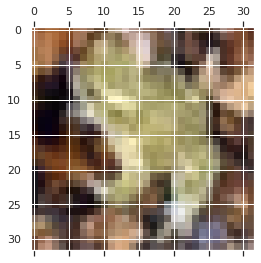

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

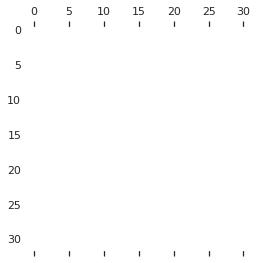

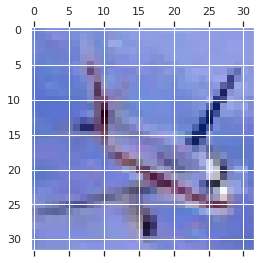

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

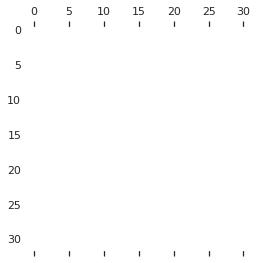

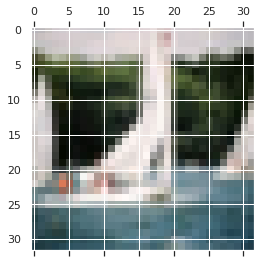

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

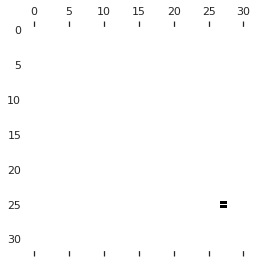

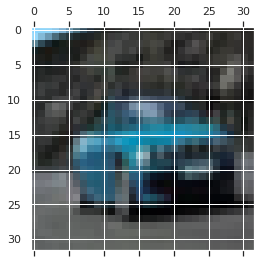

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

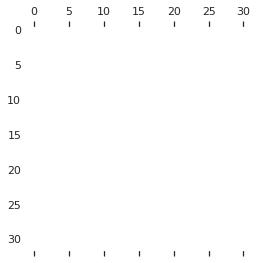

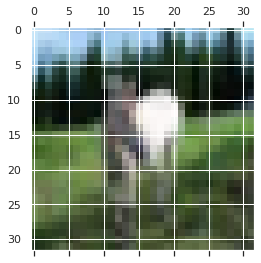

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

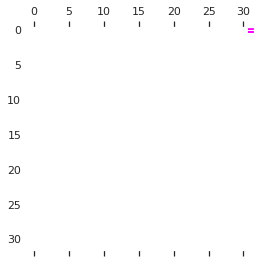

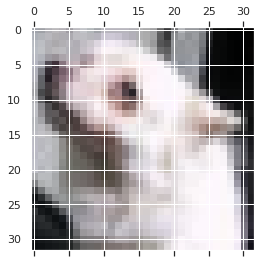

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

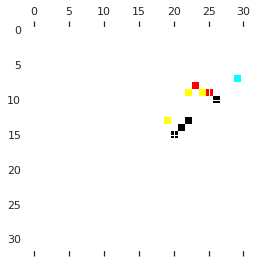

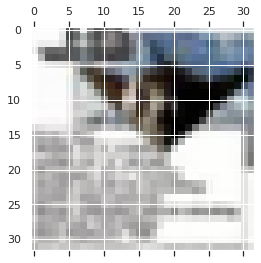

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

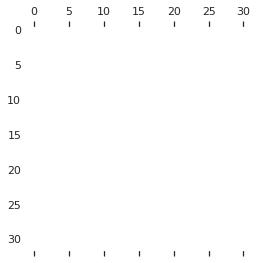

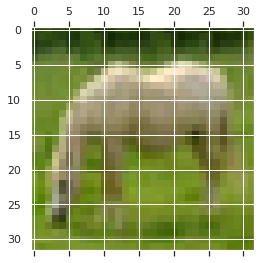

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

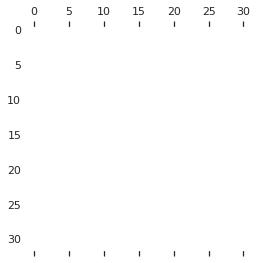

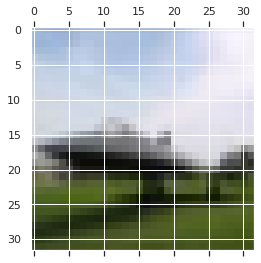

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

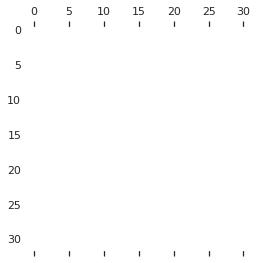

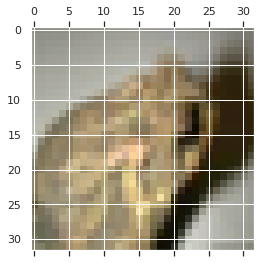

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

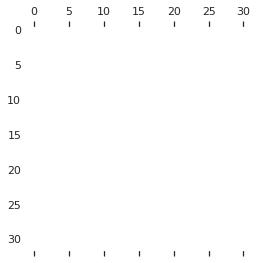

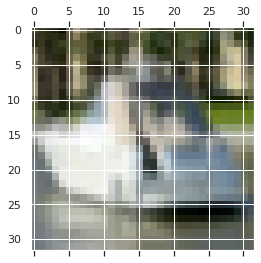

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 720x720 with 0 Axes>

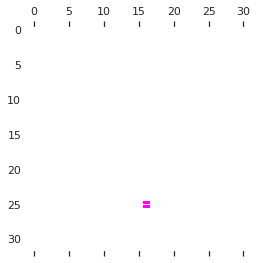

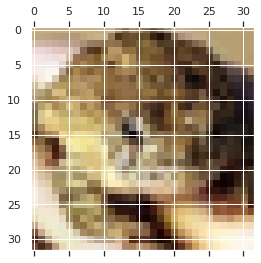

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.cm as cm
from IPython.display import Image
import random
sns.set(rc={'figure.figsize':(4,4)})
imgtracker = []
for i in range(0,10):
  imgtracker.append(0)
i = 0
imgno = 0
arraylen = len(yTest)
yTestNew= tf.math.argmax(yTest, axis=1)

last_conv_layer_name = "conv2d_21"
classifier_layer_names = [
    "max_pooling2d_9",
    "dense_3",
]
print(yTestNew)
while i < 20:
  randpos = random.randint(0, arraylen-1)
  # Prepare image
  imgtracker[yTestNew[randpos]] += 1
  imgArray = xTest[randpos:randpos+1]  
  imgno = randpos
  # Print what the top predicted class is
  preds = denseModel.predict(imgArray)
  # Generate class activation heatmap
  heatmap = make_gradcam_heatmap(imgArray, denseModel, last_conv_layer_name, classifier_layer_names)
  display_heatmap(imgArray[0],heatmap,image_save_name = "img" + str(i),weight = .01)
  #plt.matshow(heatmap)
  #plt.show()
  i = i+1

# Question 2 (Explainability):

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 16.9MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283846 sha256=4b8fb354178d630145672b9d137073d50a1d2bb761a8067fd3cccf99cb12f109
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

import pandas as pd
import numpy as np
import lightgbm as lgb

# For converting textual categories to integer labels 
from sklearn.preprocessing import LabelEncoder

# for creating train test split
from sklearn.model_selection import train_test_split

In [ ]:
# specify your configurations as a dict
lgb_params = {
    'task': 'train',
    'boosting_type': 'goss',
    'objective': 'binary',
    'metric':'binary_logloss',
    'metric': {'l2', 'auc'},
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'verbose': None,
    'num_iteration':100,
    'num_threads':7,
    'max_depth':12,
    'min_data_in_leaf':100,
    'alpha':0.5}



In [ ]:

# Prepare model for classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
# getting tenser flow for the dataset
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

# load train and test dataset
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

#xTrain = xTrain / 255.0
#xTest = xTest / 255.0
xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')
# one hot encode target values
yTrainCat = to_categorical(yTrain, 10)
yTestCat = to_categorical(yTest, 10)


print(xTest.shape)
print(yTest.shape)
print(yTrainCat.shape)
print(yTestCat.shape)

170500096/170498071 [==============================] - 2s 0us/step
(10000, 32, 32, 3)
(10000, 1)
(50000, 10)
(10000, 10)


In [ ]:
# define cnn model
cifarModel = models.Sequential()
cifarModel.add(Conv2D(input_shape=(32, 32, 3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
cifarModel.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
cifarModel.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cifarModel.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(Dropout(0.4))
cifarModel.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cifarModel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cifarModel.add(Dropout(0.4))
cifarModel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cifarModel.add(Dropout(0.4))
cifarModel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
cifarModel.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
cifarModel.add(Dropout(0.4))
cifarModel.add(Flatten())
cifarModel.add(Dense(256, activation='relu'))
cifarModel.add(Dropout(0.4))
cifarModel.add(Dense(100, activation='relu'))
cifarModel.add(Dropout(0.4))
cifarModel.add(Dense(10, activation='softmax'))

cifarModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0

In [ ]:
# compile model
opt = SGD(lr=0.001, momentum=0.9)
#cifarModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cifarModel.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = cifarModel.fit(xTrain, yTrainCat, epochs=50, batch_size=32, validation_data=(xTest, yTestCat))


In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/Colab Notebooks/DAI_Assignment3/dai3Model.h5')

In [ ]:
_, testAccuracy = model.evaluate(xTest, yTestCat, verbose = 2)
print('Test accuracy:', testAccuracy)

313/313 - 8s - loss: 0.5740 - accuracy: 0.8205
Test accuracy: 0.8205000162124634


In [ ]:
from sklearn.metrics import accuracy_score
# from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
# Model Logisitic Regression
model_logreg = LogisticRegression()
model_logreg.fit(xTrain, yTrain)
accuracy_score(xTest, model_logreg.predict(xTest))

In [ ]:

# def lgb_model(X_train,y_train,X_test,y_test,lgb_params):
# create dataset for lightgbm
lgb_train = lgb.Dataset(xTrain, yTrain)
lgb_eval = lgb.Dataset(xTest, yTest)

In [ ]:

# this is required as LIME requires class probabilities in case of classification example
# LightGBM directly returns probability for class 1 by default 
def prob(data):
    return np.array(list(zip(1-model.predict(data),model.predict(data))))
    
explainer = lime.lime_tabular.LimeTabularExplainer(df_titanic[model.feature_name()].astype(int).values,  
mode='classification',training_labels=cifar10['cat'],feature_names=model.feature_name())


# asking for explanation for LIME model
i = 1
exp = explainer.explain_instance(cifar10.loc[i,feat].astype(int).values, prob, num_features=5)
